In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

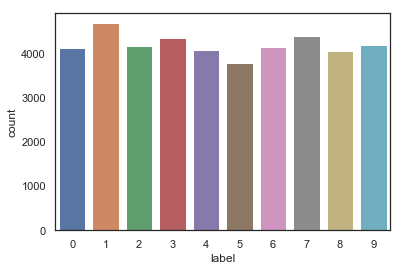

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [3]:
X_train = X_train / 255.0
test = test / 255.0

In [4]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [5]:
n_values = np.max(Y_train) + 1
Y_train = np.eye(n_values)[Y_train]

# Y_train = to_categorical(Y_train, num_classes = 10)

In [6]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

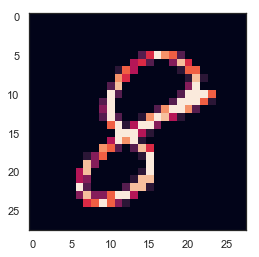

In [7]:
g = plt.imshow(X_train[0][:,:,0])

In [8]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

In [9]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), input_shape=im_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(32))

# model.add(Dense(10))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy', ## 'sparse_categorical_crossentropy'
#               optimizer='adam',
#               metrics=['accuracy'])

# model.fit(X_train,Y_train, batch_size=32, epochs=20, validation_split=0.2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

dense_layers = [1, 2, 3]
layer_sizes = [64, 128]
conv_layers = [2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X_train.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(10))
            model.add(Activation('softmax'))

            tensorboard = TensorBoard(log_dir="logs_MNIST_16/{}".format(NAME))

            model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X_train, Y_train,
                      batch_size=32,
                      epochs=16,
                      validation_split=0.2,
                      callbacks=[tensorboard])

2-conv-64-nodes-1-dense-1555529727
Train on 30240 samples, validate on 7560 samples
Epoch 1/16
30240/30240 [==============================] - 69s 2ms/step - loss: 0.2078 - acc: 0.9350 - val_loss: 0.0927 - val_acc: 0.9722
Epoch 2/16
30240/30240 [==============================] - 67s 2ms/step - loss: 0.0632 - acc: 0.9809 - val_loss: 0.0466 - val_acc: 0.9853
Epoch 3/16
30240/30240 [==============================] - 58s 2ms/step - loss: 0.0402 - acc: 0.9874 - val_loss: 0.0548 - val_acc: 0.9851
Epoch 4/16
30240/30240 [==============================] - 48s 2ms/step - loss: 0.0312 - acc: 0.9904 - val_loss: 0.0441 - val_acc: 0.9865
Epoch 5/16
30240/30240 [==============================] - 51s 2ms/step - loss: 0.0233 - acc: 0.9926 - val_loss: 0.0437 - val_acc: 0.9873
Epoch 6/16
30240/30240 [==============================] - 51s 2ms/step - loss: 0.0181 - acc: 0.9933 - val_loss: 0.0412 - val_acc: 0.9880
Epoch 7/16
30240/30240 [==============================] - 48s 2ms/step - loss: 0.0147 - acc: 0